# Dataset Preview

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_kwargs = {
    'scalings': dict(eeg=20e-5),
    'show_scrollbars': False,
}

In [2]:
import database.database_utils as db
db.connect()
db_object = db.summary_by_name('chb01_03.edf')

In [ ]:
import model.summary_model_converter as converter
summary_model_renamed = converter.model_from_tuple( db_object )
summary_model_renamed.generate_mne(True)

Generate and plot time data

Using matplotlib as 2D backend.


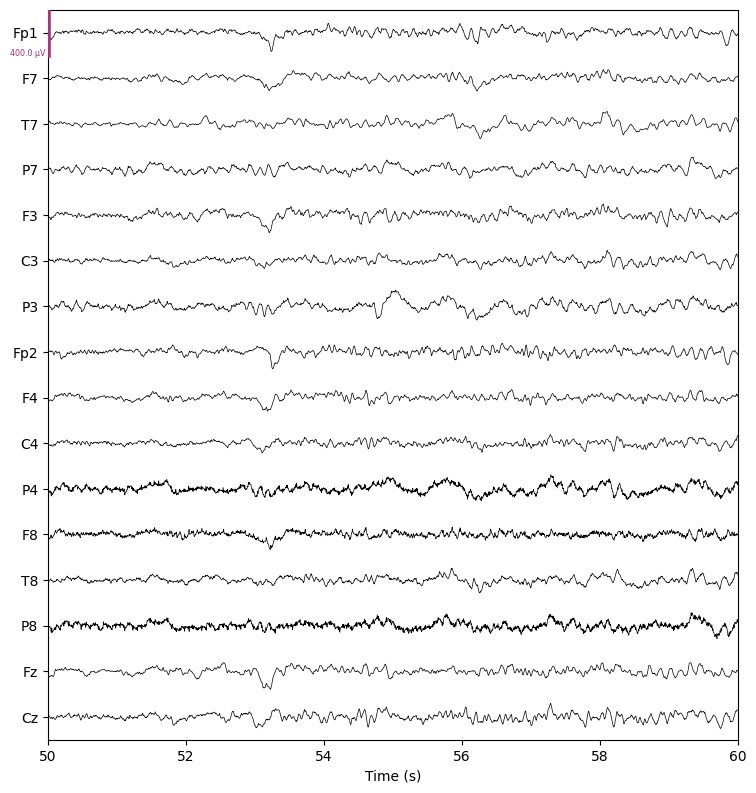

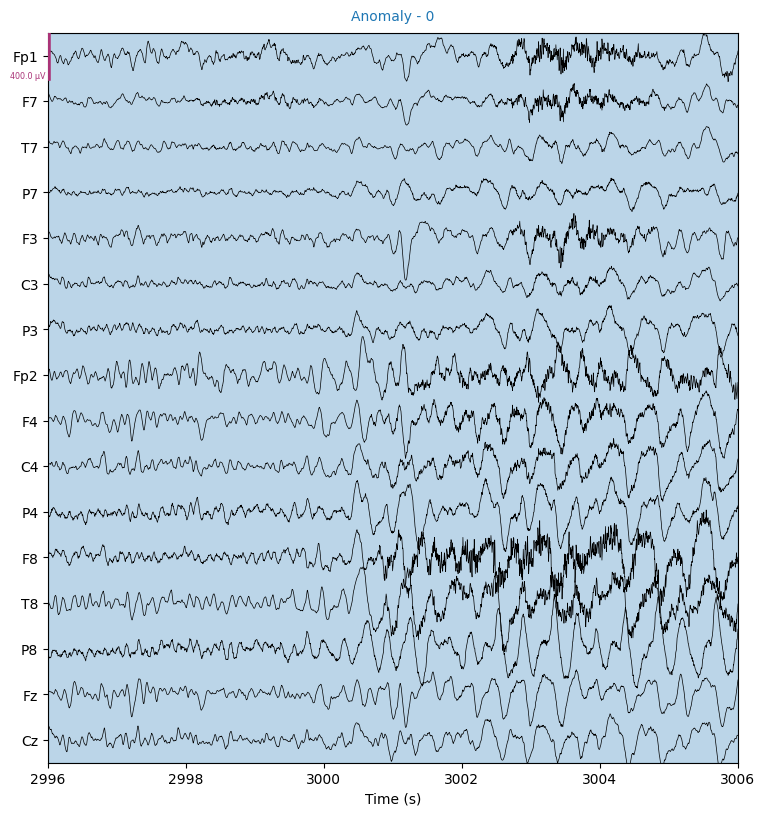

In [4]:
summary_model_renamed.signal.time_data.plot(start = 50, **plot_kwargs);
summary_model_renamed.signal.time_data.plot(start=summary_model_renamed.start_time_of_seizure(1), **plot_kwargs);

Generate and plot frequency data

c:\Users\luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


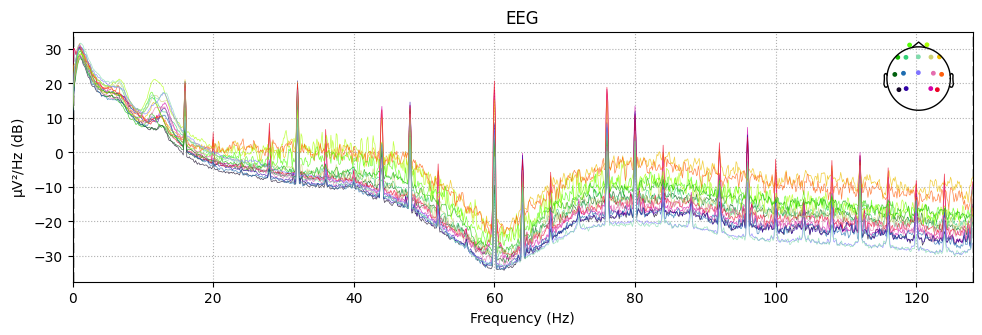

In [5]:
summary_model_renamed.signal.generate_freq_data()
summary_model_renamed.signal.freq_data.plot();

Need more than one channel to make topography for eeg. Disabling interactivity.


c:\Users\luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


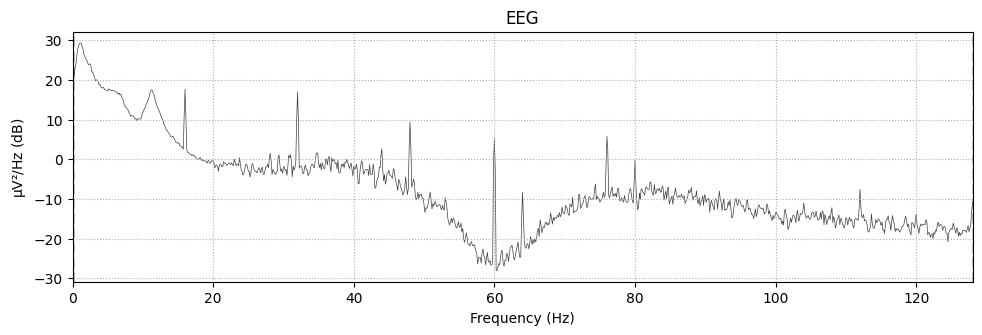

In [6]:
summary_model_renamed.signal.freq_data.plot(picks="Fp1");

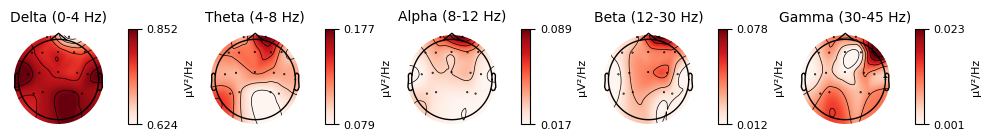

In [7]:
summary_model_renamed.signal.freq_data.plot_topomap(ch_type='eeg', normalize=True);

Generate and plot time-frequency data (Spectogram)

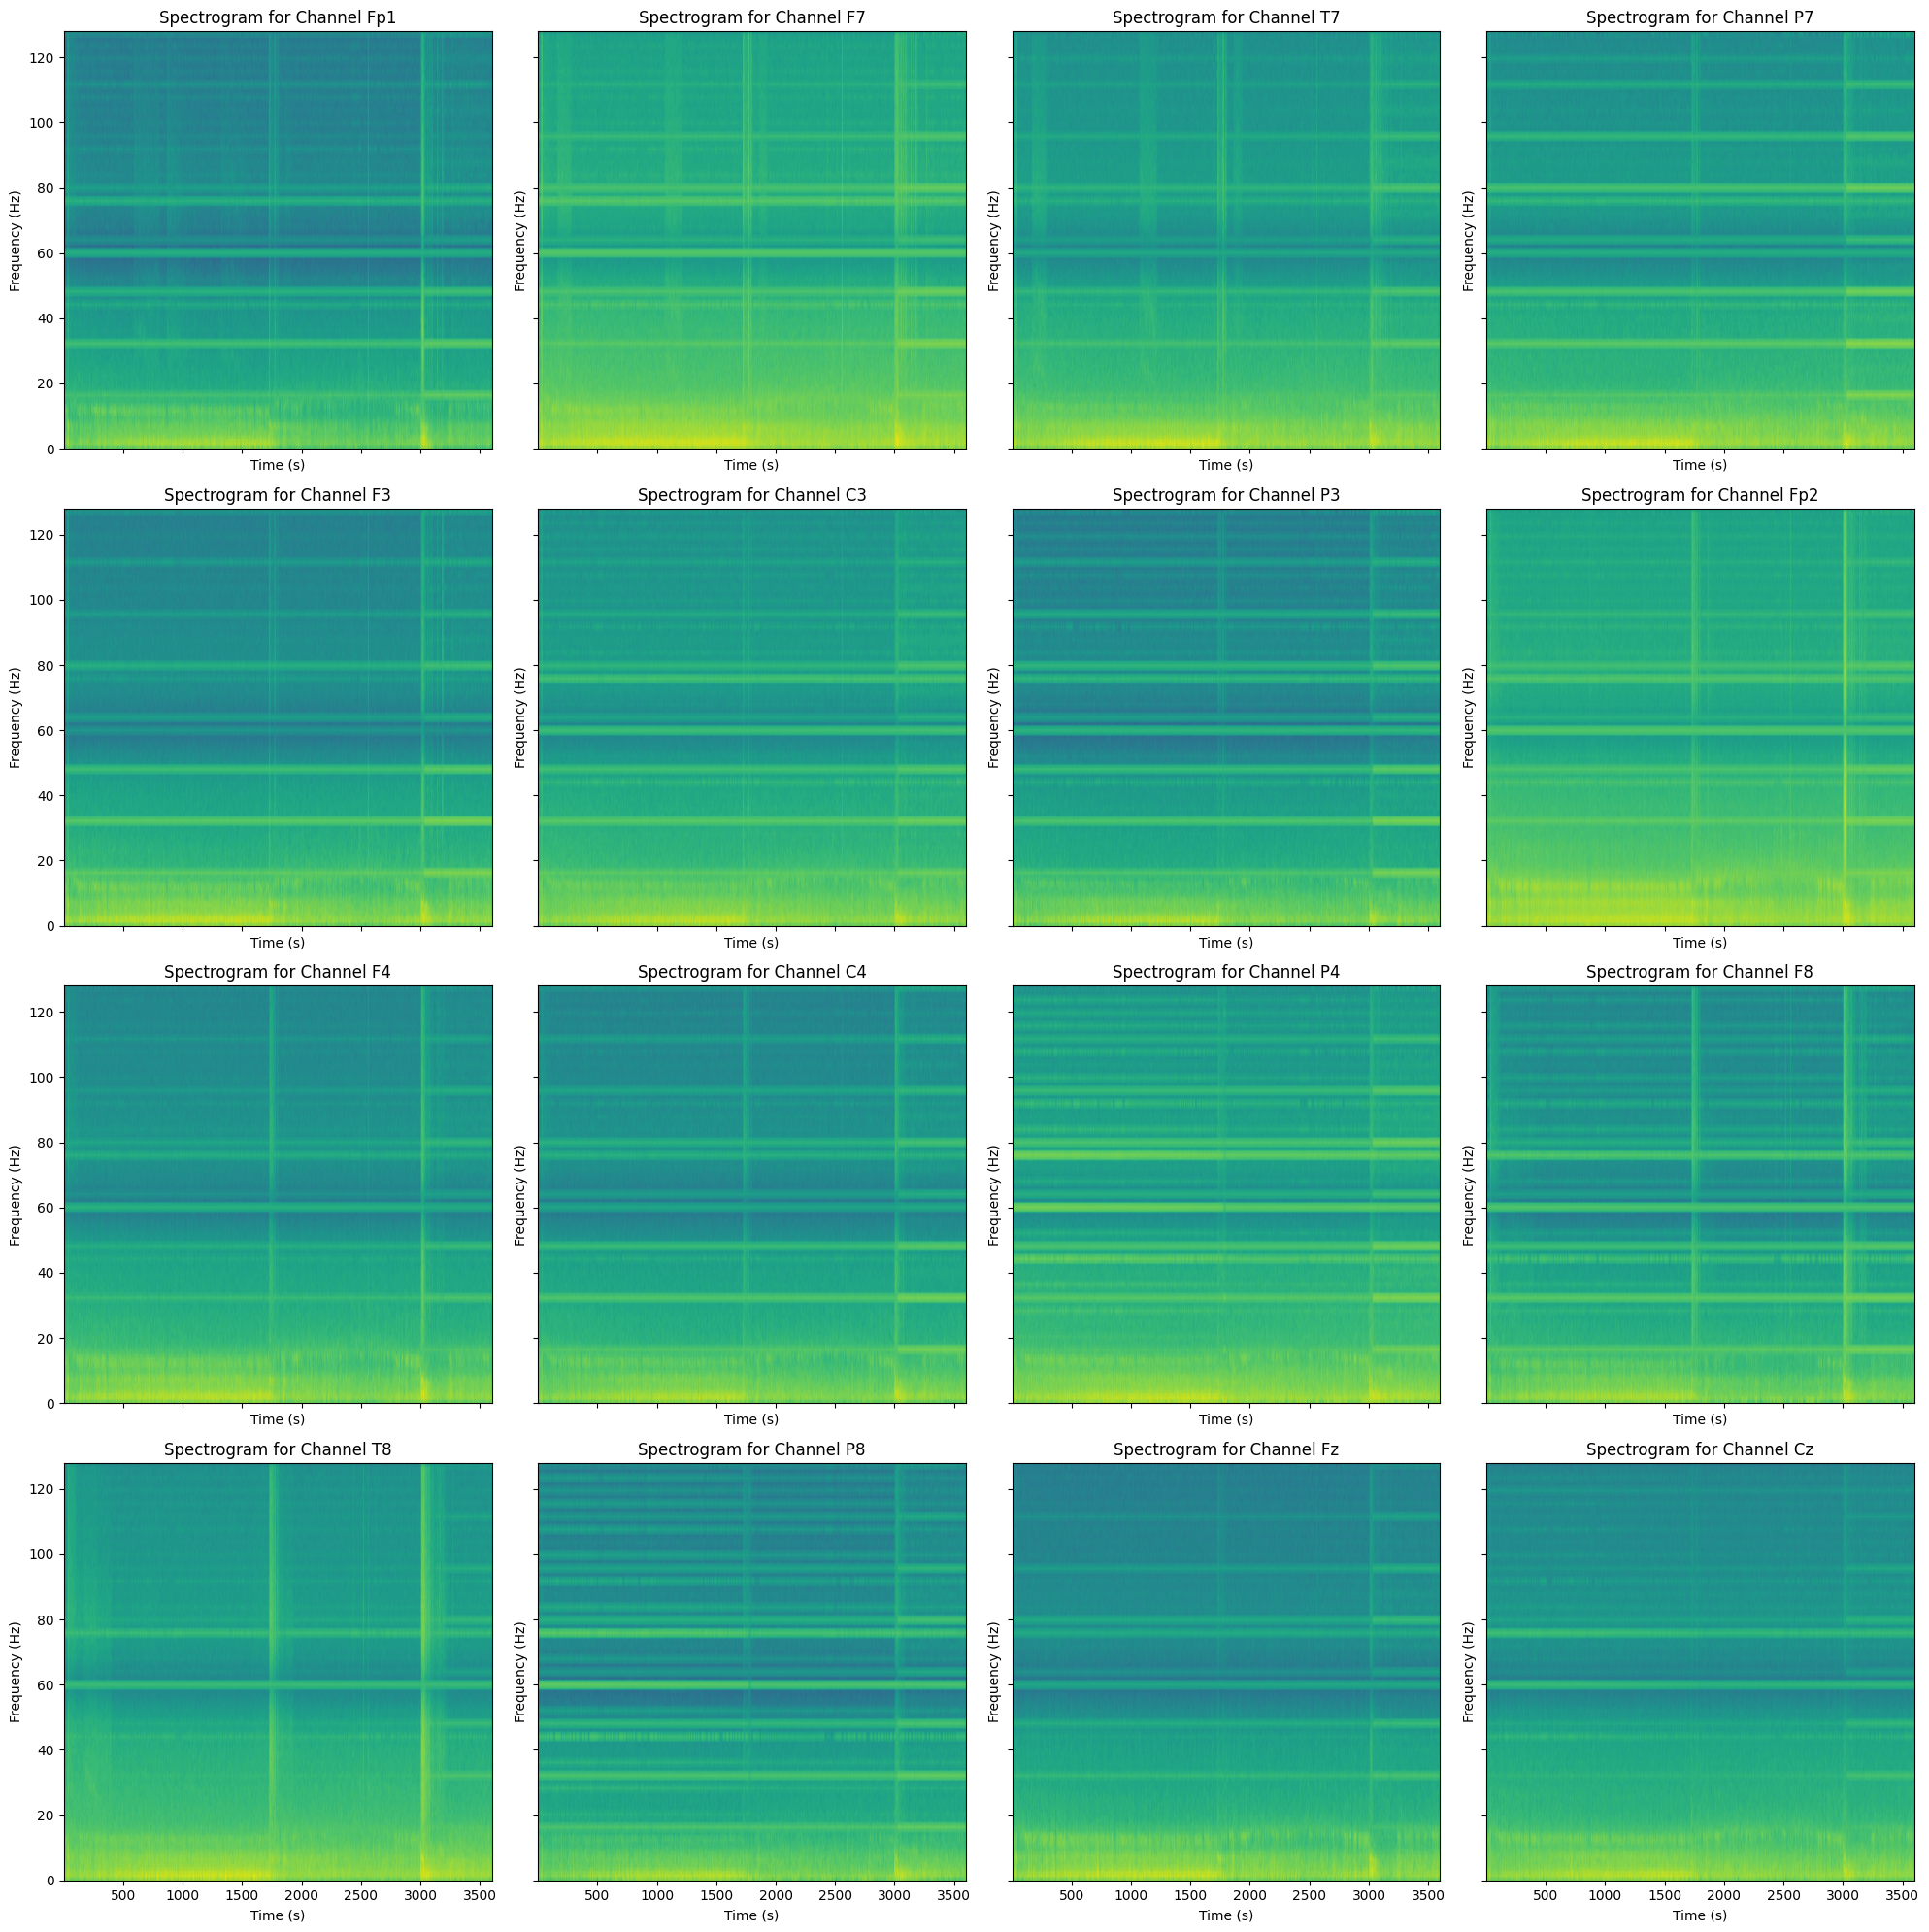

In [8]:
import numpy as np
import matplotlib.pyplot as plt

channel_buffers, times = summary_model_renamed.signal.time_data.get_data(return_times=True)

num_rows = int(np.ceil(np.sqrt(len(channel_buffers))))
num_cols = int(np.ceil(len(channel_buffers) / num_rows))

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, num_rows*5), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten()):
    if i < len(channel_buffers):
        ax.specgram(channel_buffers[i], Fs=summary_model_renamed.signal.time_data.info['sfreq'], NFFT=256, noverlap=128, cmap='viridis')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title(f'Spectrogram for Channel {summary_model_renamed.signal.time_data.ch_names[i]}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show();